In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 95% : \n$\\left( \\overline{x}-\\overline{y}\\right)$-1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$ , $\\left( \\overline{x}-\\overline{y}\\right)$+ 1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$')

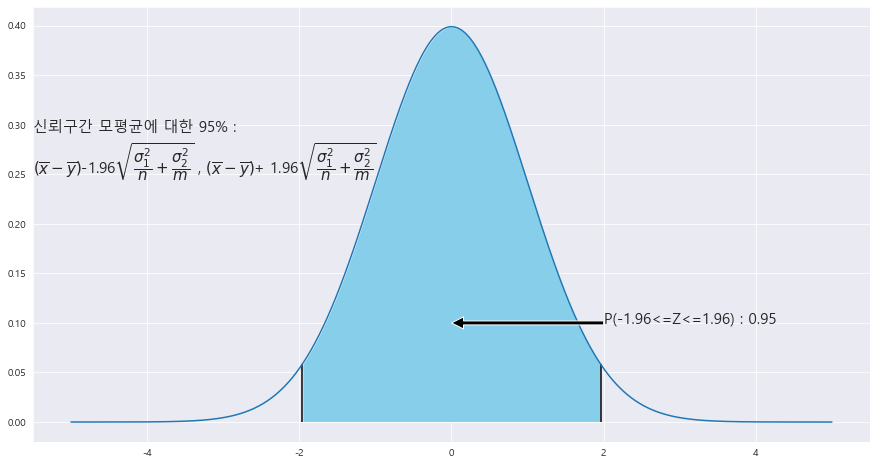

In [2]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 95% , \n신뢰구간 L = $2*{1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $: \n(1.155 ~ 3.845)')

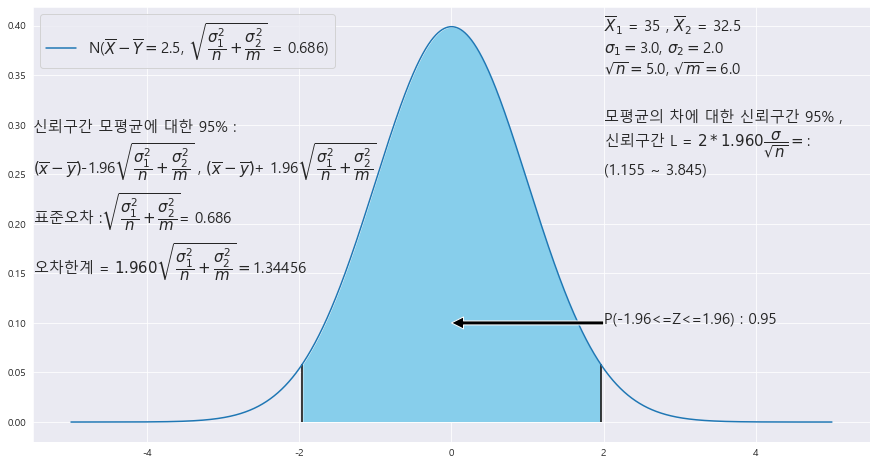

In [30]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 35
MEANS_B = 32.5
Var_A = 9
Var_B = 4
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 25
n_B = 36

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{MEANS_A - MEANS_B}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')
ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{z_1 * round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 95% , \n신뢰구간 L = $2*{1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $: \n(143.123 ~ 182.877)')

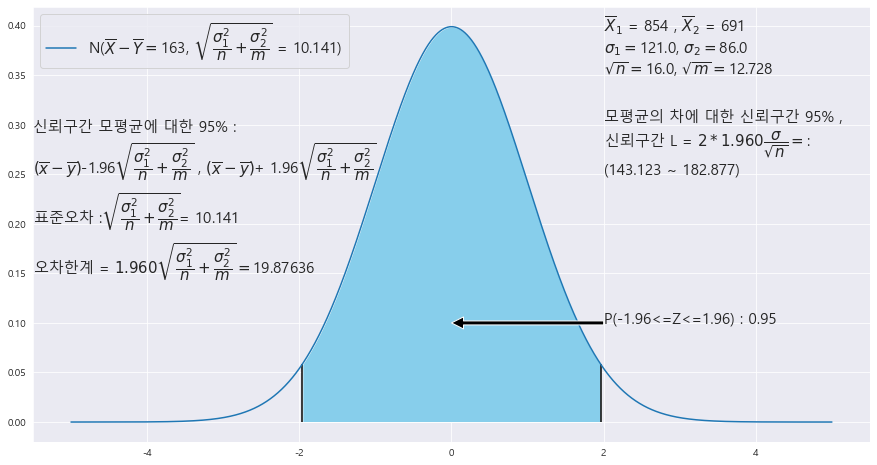

In [31]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 854
MEANS_B = 691
Var_A = 121**2
Var_B = 86**2
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 256
n_B = 162

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{MEANS_A - MEANS_B}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')
ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{z_1 * round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.3, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.412')

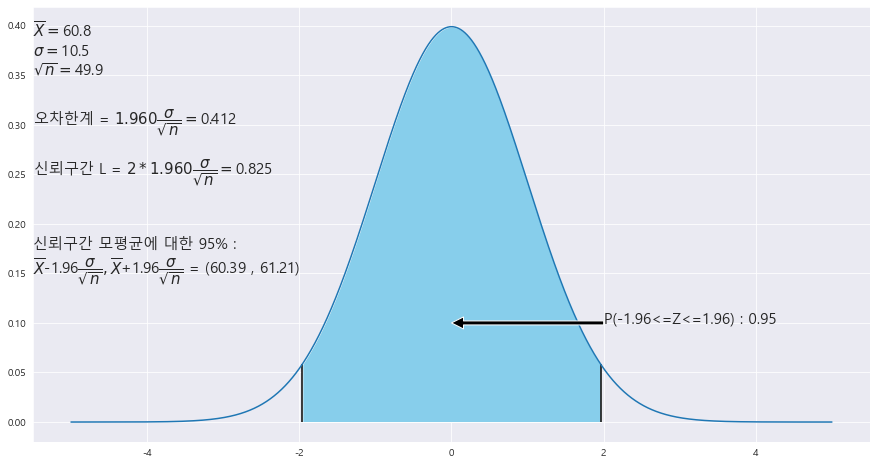

In [37]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)



MEANS = 60.8
STDS = round(math.sqrt(10.5**2),3) #모표준편차
n = 2490



ax.text(-5.5 , .35,  r'$\overline{X} = $'+f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ = ' + f'({round(MEANS - z_1*STDS/math.sqrt(n),2)} , {round(MEANS + z_1*STDS/math.sqrt(n),2)})',fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


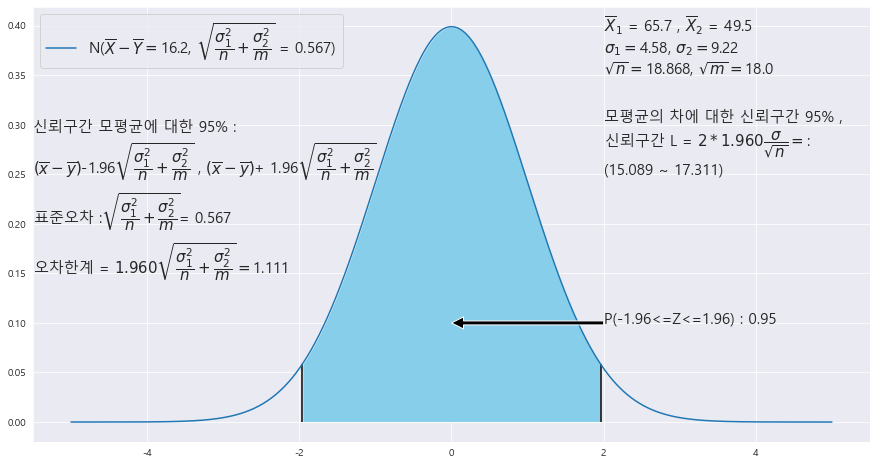

In [40]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 65.7
MEANS_B = 49.5
Var_A = 21
Var_B = 85
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 356
n_B = 324

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)




ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{round(z_1 * math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{round(MEANS_A - MEANS_B ,2)}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


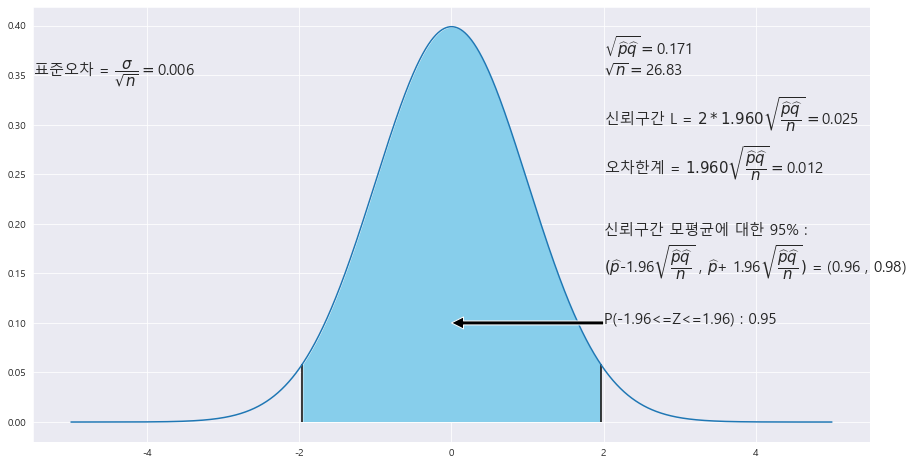

In [45]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)






# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.97
n = 720


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round( z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(-5.5 , .35,  r'표준오차 = $\dfrac{\sigma}{\sqrt{n}} = $' + f'{round( math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$(\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}})$ = ' + f'({round(RATIO - z_1*math.sqrt(RATIO*(1-RATIO) /n),2)} , {round(RATIO + z_1*math.sqrt(RATIO*(1-RATIO) /n),2)})' ,fontsize=15)
print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


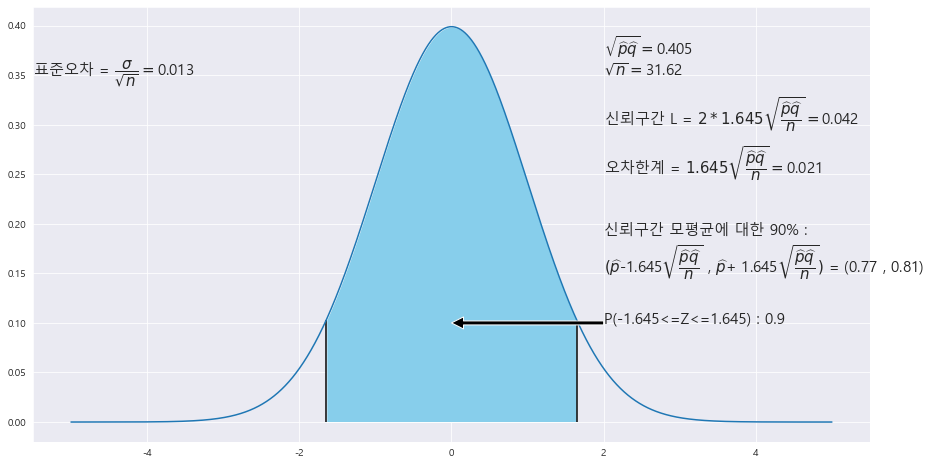

In [46]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)






# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.793
n = 1000


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round( z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(-5.5 , .35,  r'표준오차 = $\dfrac{\sigma}{\sqrt{n}} = $' + f'{round( math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$(\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}})$ = ' + f'({round(RATIO - z_1*math.sqrt(RATIO*(1-RATIO) /n),2)} , {round(RATIO + z_1*math.sqrt(RATIO*(1-RATIO) /n),2)})' ,fontsize=15)
print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


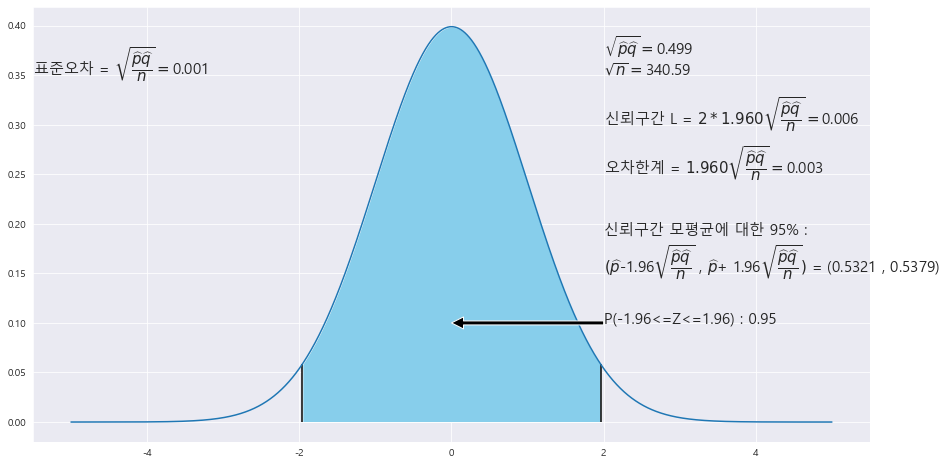

In [50]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)






# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.535
n = 116000


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round( z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(-5.5 , .35,  r'표준오차 = $\sqrt{\dfrac{\widehat{p}\widehat{q}}{{n}}} = $' + f'{round( math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$(\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}})$ = ' + f'({round(RATIO - z_1*math.sqrt(RATIO*(1-RATIO) /n),4)} , {round(RATIO + z_1*math.sqrt(RATIO*(1-RATIO) /n),4)})' ,fontsize=15)
print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


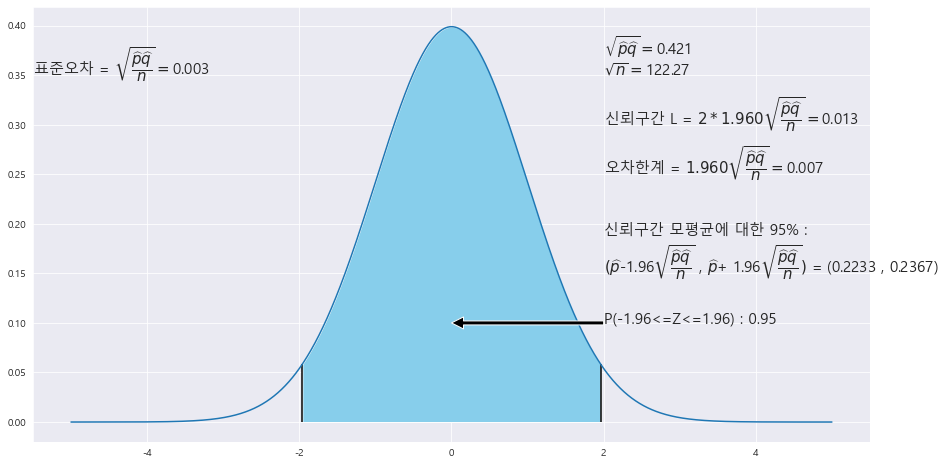

In [51]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)






# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.23
n = 14950


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round( z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(-5.5 , .35,  r'표준오차 = $\sqrt{\dfrac{\widehat{p}\widehat{q}}{{n}}} = $' + f'{round( math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$(\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}})$ = ' + f'({round(RATIO - z_1*math.sqrt(RATIO*(1-RATIO) /n),4)} , {round(RATIO + z_1*math.sqrt(RATIO*(1-RATIO) /n),4)})' ,fontsize=15)
print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 95% 에 대한 오차 한계( $e_{95}) : $ \n${1.960}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.005 ')

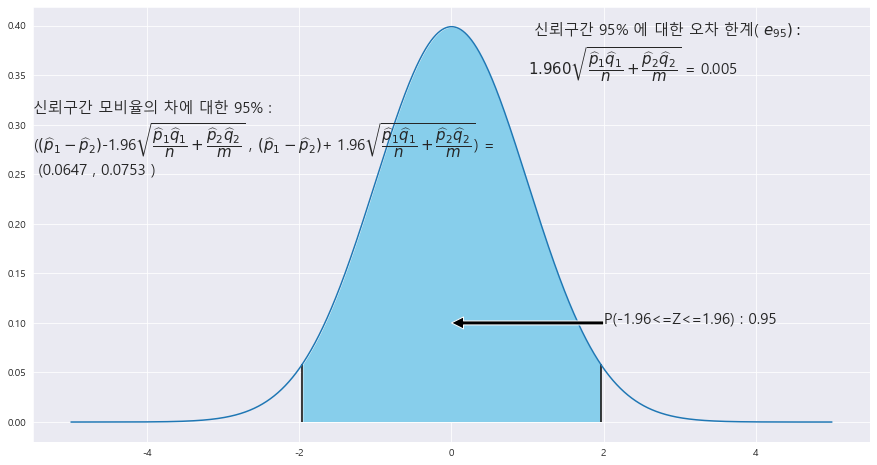

In [55]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)


p1 = 0.268
p2 = 0.198
A = 48000
B = 48000
ax.text(-5.5 , .25, f'신뢰구간 모비율의 차에 대한 {trust}% : \n' + r'($\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$) =' + f'\n ({round(p1-p2 - z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} , {round(p1-p2 + z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} )',fontsize=15)


ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)

# 18번

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 95% , \n신뢰구간 L = $2*{1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $: \n(11.787 ~ 13.213)')

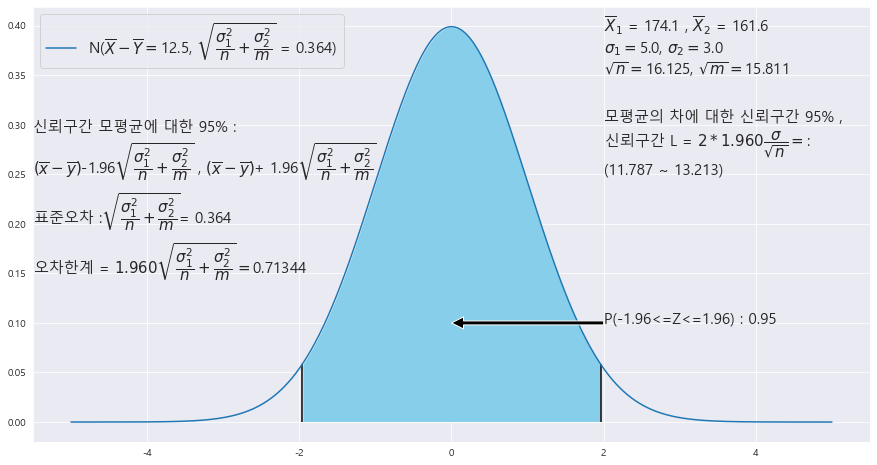

In [56]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 174.1
MEANS_B = 161.6
Var_A = 5**2
Var_B = 3**2
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 260
n_B = 250

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{MEANS_A - MEANS_B}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')
ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{z_1 * round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 99% , \n신뢰구간 L = $2*{2.576}\\dfrac{\\sigma}{\\sqrt{n}} = $: \n(12.574 ~ 14.226)')

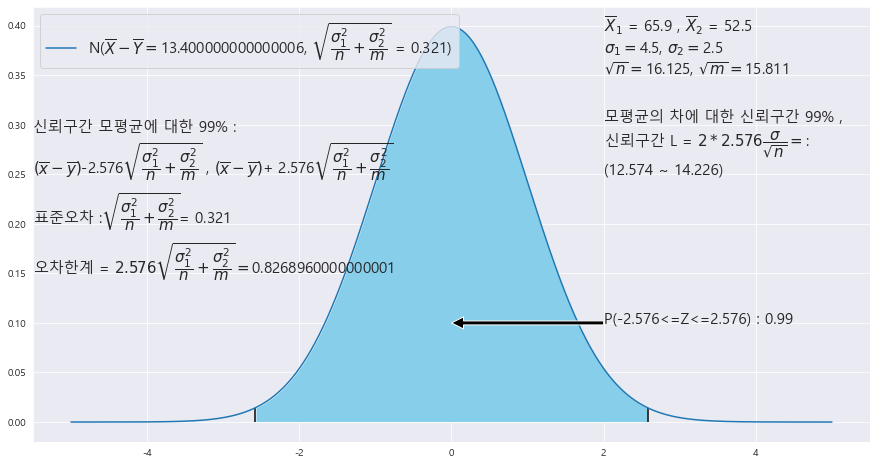

In [58]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 99#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 65.9
MEANS_B = 52.5
Var_A = 4.5**2
Var_B = 2.5**2
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 260
n_B = 250

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{MEANS_A - MEANS_B}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')
ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{z_1 * round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 90% 에 대한 오차 한계( $e_{90}) : $ \n${1.645}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.072 ')

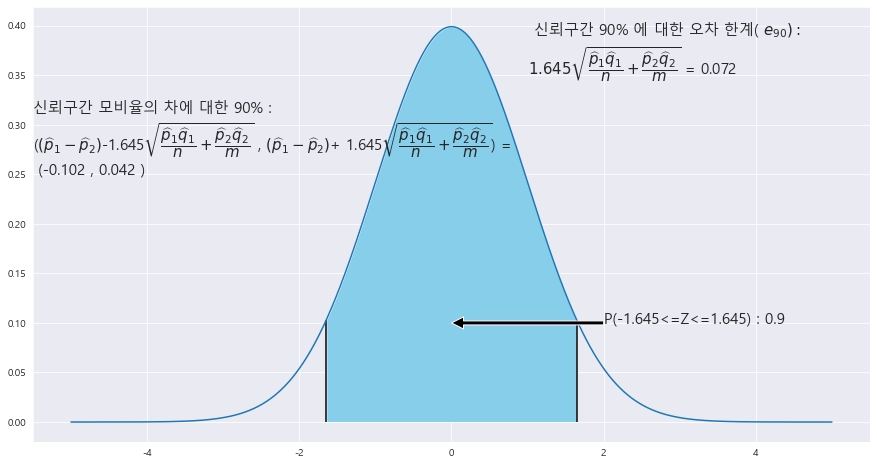

In [60]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)


p1 = 0.411
p2 = 0.441
A = 260
B = 250
ax.text(-5.5 , .25, f'신뢰구간 모비율의 차에 대한 {trust}% : \n' + r'($\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$) =' + f'\n ({round(p1-p2 - z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} , {round(p1-p2 + z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} )',fontsize=15)


ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 95% 에 대한 오차 한계( $e_{95}) : $ \n${1.960}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.083 ')

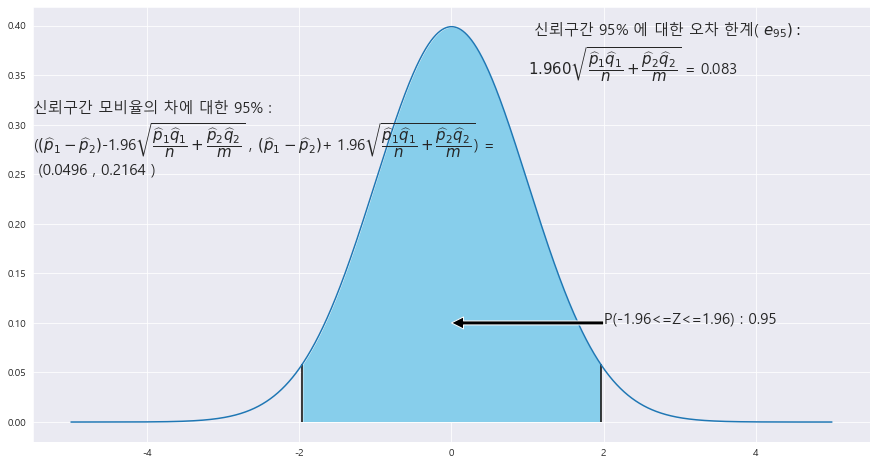

In [61]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)


p1 = 0.689
p2 = 0.556
A = 260
B = 250
ax.text(-5.5 , .25, f'신뢰구간 모비율의 차에 대한 {trust}% : \n' + r'($\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$) =' + f'\n ({round(p1-p2 - z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} , {round(p1-p2 + z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} )',fontsize=15)


ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)